## TechChallenge Módulos 3 e 4 

# Problema 

Imagine que você foi escalado para um time de investimentos e precisará realizar um modelo preditivo com dados da IBO-VESPA (Bolsa de valores) para criar uma série temporal e prever diariamente o fechamento da base.

Para isso utilize a base de dados contida no site da investing e selecione o período "diário", com o intervalo de tempo que achar adequado.

Você precisará demonstrar para o time de investimentos:
1. O modelo com o storytelling, desde a captura do dado até a entrega do modelo;
2. Justificar a técnica utilizada;
3. Atingir uma acuracidade adequada (acima de 70%).

DICA - Utilize o maior intervalo de tempo possível para atingir maior acuracidade no modelo preditivo

https://br.investing.com/indices/bovespa-historical-data


In [275]:
import pandas as pd
import locale

locale.setlocale(locale.LC_ALL, 'pt_BR.UTF-8')

dados = pd.read_csv('/Users/marco/Library/CloudStorage/OneDrive-Fiap-FaculdadedeInformáticaeAdministraçãoPaulista/POS_FIAP_ALURA/Modulos 3 e 4/Challenge/Dados Históricos - Ibovespac(01-01-2000 ate 18-08-2023).csv',parse_dates = ['Data'])

dados_df = pd.DataFrame(data=dados, columns=[['Data','Ultimo_fechamento','Abertura','Max','Min','Volume','Variacao_percent']])

/var/folders/yy/j7q__sds4d7_4kx430yt5khr0000gn/T/ipykernel_18526/707622320.py:6: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  dados = pd.read_csv('/Users/marco/Library/CloudStorage/OneDrive-Fiap-FaculdadedeInformáticaeAdministraçãoPaulista/POS_FIAP_ALURA/Modulos 3 e 4/Challenge/Dados Históricos - Ibovespac(01-01-2000 ate 18-08-2023).csv',parse_dates = ['Data'])


In [276]:
dados.columns = ['Data','Ultimo_fechamento','Abertura','Max','Min','Volume','Variacao_percent']

In [277]:
dados

,Data,Ultimo_fechamento,Abertura,Max,Min,Volume,Variacao_percent
0,2021-11-03,114.98,112.78,115.13,112.78,"12,09M","1,96%"
1,2021-10-03,112.78,111.33,112.93,110.00,"12,51M","1,30%"
2,2021-09-03,111.33,110.61,112.53,109.34,"12,14M","0,65%"
3,2021-08-03,110.61,115.20,115.20,110.27,"13,70M","-3,98%"
4,2021-05-03,115.20,112.69,115.50,112.50,"13,25M","2,23%"
...,...,...,...,...,...,...,...
4994,2001-04-01,16.68,16.60,16.93,16.59,"331,23M","0,46%"
4995,2001-03-01,16.60,15.43,16.60,15.25,"381,20M","7,61%"
4996,2001-02-01,15.43,15.24,15.62,15.17,"230,63M","1,09%"
4997,2000-12-28,15.26,15.19,15.27,15.13,"324,26M","0,48%"


Achar valores Nulos

In [307]:
#Antes
print('Total de Colunas com Valores Nulos : ',dados.isna().any().sum())
display(dados.isna().sum())
dados.info()

Total de Colunas com Valores Nulos :  0


Data                 0
Ultimo_fechamento    0
Abertura             0
Max                  0
Min                  0
Volume_N             0
Variacao_percent     0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4998 entries, 0 to 4998
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Data               4998 non-null   datetime64[ns]
 1   Ultimo_fechamento  4998 non-null   float64       
 2   Abertura           4998 non-null   float64       
 3   Max                4998 non-null   float64       
 4   Min                4998 non-null   float64       
 5   Volume_N           4998 non-null   float64       
 6   Variacao_percent   4998 non-null   object        
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 312.4+ KB


In [279]:
#Linhas com valores nulos 
dados[dados['Volume'].isna()]


,Data,Ultimo_fechamento,Abertura,Max,Min,Volume,Variacao_percent
1258,2016-10-02,40.38,40.59,40.59,39.96,NaN,"-0,53%"


In [280]:
#Apagar a linha com registro Null
dados.dropna(subset=['Volume'], how ='any', axis = 0,inplace=True)

In [281]:
#Depois
print('Colunas com Valores Nulos : ',dados.isna().any().sum())
display(dados.isna().sum())
dados.info()

Colunas com Valores Nulos :  0


Data                 0
Ultimo_fechamento    0
Abertura             0
Max                  0
Min                  0
Volume               0
Variacao_percent     0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4998 entries, 0 to 4998
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Data               4998 non-null   datetime64[ns]
 1   Ultimo_fechamento  4998 non-null   float64       
 2   Abertura           4998 non-null   float64       
 3   Max                4998 non-null   float64       
 4   Min                4998 non-null   float64       
 5   Volume             4998 non-null   object        
 6   Variacao_percent   4998 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 312.4+ KB


identificar os casos da coluna volume que tem letra M e converte para int ou float, 
casos com M = Multiplica por 1_000_000
casos com K = Multiplica por 1_000

In [282]:
#pd.options.display.float_format = '{:.2f}'.format


escala = {'M': 1_000_000, 'K': 1_000} #Dicionario com escala do valor

def Converte_valor(valor):
    if isinstance(valor, str):
        numero, letra = valor[:-1], valor[-1] #Percorre para o ultimo caracter do item se tiver o ..M ou ..K vai cair na regra especifica do dict
        if letra in escala:
            return float(numero.replace(',', '.')) * escala[letra]
    return valor

dados['Volume_N'] = dados['Volume'].apply(Converte_valor)

# Aplicar a formatação de acordo com a localização
# dados['Volume_N'] = dados['Volume_N'].apply(lambda x: locale.format_string('%d', x))


In [283]:
#Consultar valores do volume K ou M
filtro_KM = dados['Volume'].str.endswith('K')

dados[filtro_KM]

,Data,Ultimo_fechamento,Abertura,Max,Min,Volume,Variacao_percent,Volume_N
420,2019-01-07,101.34,100.97,102.43,100.97,"424,32K","0,37%",424320.00
909,2017-04-07,63.23,63.27,63.35,63.08,"980,07K","-0,08%",980070.00
1033,2017-02-01,59.59,60.23,60.23,59.37,"833,73K","-1,06%",833730.00
1037,2016-12-26,58.62,57.94,58.78,57.94,"701,23K","1,18%",701230.00
1652,2014-04-07,54.06,53.89,54.09,53.70,"753,84K","0,34%",753840.00
...,...,...,...,...,...,...,...,...
3196,2008-08-04,64.54,64.18,64.83,63.45,"877,99K","0,57%",877990.00
3197,2008-07-04,64.18,64.45,65.41,63.92,"909,33K","-0,42%",909330.00
3198,2008-04-04,64.45,64.18,64.63,63.91,"812,76K","0,42%",812760.00
3295,2007-07-11,63.50,64.50,64.60,63.22,"112,10K","-1,55%",112100.00


In [284]:
#dados['Data'] = dados['Data'].str.replace('','').astype('datetime64[Y]')
dados['Data'] = dados['Data'].astype('datetime64[Y]')

In [285]:
dados=dados[['Data','Ultimo_fechamento','Abertura','Max','Min','Volume_N','Variacao_percent']]

In [287]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4998 entries, 0 to 4998
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Data               4998 non-null   datetime64[ns]
 1   Ultimo_fechamento  4998 non-null   float64       
 2   Abertura           4998 non-null   float64       
 3   Max                4998 non-null   float64       
 4   Min                4998 non-null   float64       
 5   Volume_N           4998 non-null   float64       
 6   Variacao_percent   4998 non-null   object        
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 312.4+ KB


In [309]:
import matplotlib.pyplot as plt
import seaborn as sb


In [308]:
dados.describe()

,Ultimo_fechamento,Abertura,Max,Min,Volume_N
count,4998.00,4998.00,4998.00,4998.00,4998.00
mean,52.33,52.32,52.87,51.77,73647436.33
std,26.17,26.16,26.39,25.94,122365231.04
min,8.37,8.40,8.51,8.22,112100.00
25%,33.51,33.47,33.80,33.15,2830000.00
50%,53.88,53.87,54.39,53.26,4480000.00
75%,65.98,65.96,66.59,65.36,120220000.00
max,125.08,125.08,125.32,123.23,994960000.00


Text(0.5, 1.0, 'Histograma')

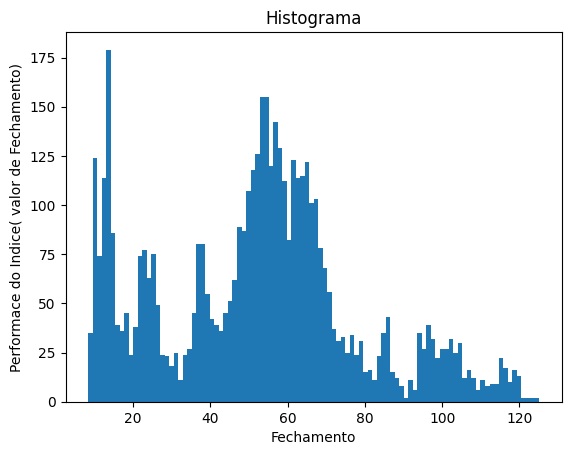

In [315]:
plt.hist( dados ['Ultimo_fechamento'],bins=100)

plt.ylabel('Performace do Indice( valor de Fechamento)')
plt.xlabel('Fechamento')

plt.title('Histograma')

Text(0.5, 1.0, 'Histograma')

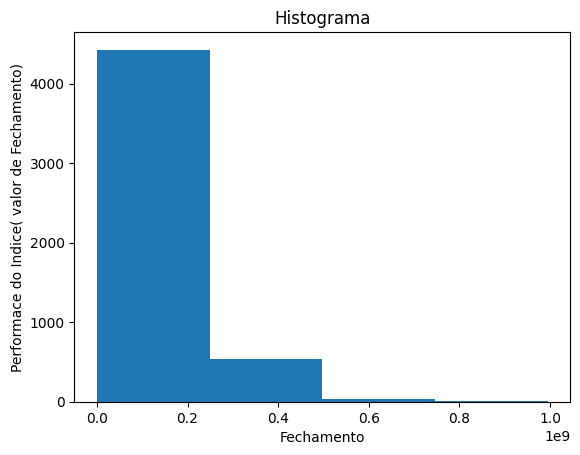

In [319]:
plt.hist( dados ['Volume_N'],bins=4)

plt.ylabel('Performace do Indice( valor de Fechamento)')
plt.xlabel('Fechamento')

plt.title('Histograma')